## Chapter5. 일급 함수

* 파이썬의 함수는 **일급 객체**       
          
* **일급 객체란?**  
런타임 생성 가능  
데이터 구조체의 변수나 요소에 할당 가능  
함수 인수로 전달 가능  
함수 결과로 반환 가능  

### 5.1 함수를 객체처럼 다루기

In [18]:
# 함수 생성 및 호출, 함수 객체가 function 클래스의 객체인지 확인
def factorial(n):
    return 1 if n < 2 else n * factorial(n-1)

factorial(5)
type(factorial)

function

In [20]:
# 함수를 다른 이름으로 사용하고 함수의 인수로 전달
fact = factorial # 변수에 할당
fact
fact(5)
list(map(fact,range(11))) # map의 인수로 전달, 반복 가능형 객체 반환

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]

* **왜 쓰는 걸까?**    
일급 함수로 함수형 스타일 프로그래밍이 가능하기 때문

### 5.2 고위 함수

* **고위 함수란?**  
함수를 인수로 받거나, 함수를 결과로 반환하는 함수  
ex) map(), sorted()

In [24]:
# 단어 리스트를 길이에 따라 정렬
fruits = ['strawberry','fig','apple','rasberry','banana']
print(sorted(fruits,key=len))
print(sorted(fruits))

['fig', 'apple', 'banana', 'rasberry', 'strawberry']
['apple', 'banana', 'fig', 'rasberry', 'strawberry']


In [27]:
# 단어 리스트를 철자 역순으로 정렬하기
def reverse(word):
    return word[::-1]
reverse('testing')
sorted(fruits,key=reverse)

['banana', 'apple', 'fig', 'rasberry', 'strawberry']

### 5.2.1 map(),filter(), reduce()의 대안

list comprehension and generator expressions는 map과 filter가 결합된 역할을 함

In [28]:
list(map(fact,range(6)))
[fact(n) for n in range(6)]

[1, 1, 2, 6, 24, 120]

In [30]:
list(map(factorial, filter(lambda n: n%2, range(6))))
[factorial(n) for n in range(6) if n % 2]

[1, 6, 120]

reduce가 python3부터 functools 모듈 내장 함수로 바뀌면서 sum을 쓰는 것이 일반적

In [34]:
from functools import reduce
from operator import add
reduce(add, range(100)) #reduce(집계 함수, 순회 가능한 데이터[, 초기값])

sum(range(100))

4950

### 5.3 익명함수

* lambda는 익명 함수를 만듬
* 인수 생성이나 파이썬 statement(while,try 등) 사용 불가 

In [36]:
# 람다 사용해 분류
fruits = ['strawberry', 'fig', 'apple', 'cherry', 'raspberry', 'banana']
sorted(fruits, key=lambda word: word[::-1])

['banana', 'apple', 'fig', 'raspberry', 'strawberry', 'cherry']

### 5.4 7개의 호출 객체

* User-defined functions : def or lambda 표현식으로 생성
* Built-in functions
* Built-in methods
* Methods : 클래스 안 함수
* Classes
* Classes instances
* Generator functions : yield를 사용할 때 함수나 메서드

### 5.5 User defined callable types

In [39]:
import random

class BingoCage:
    def __init__(self,items):
        self._items = list(items)
        random.shuffle(self._items)
    
    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')
            
    def __call__(self):
        return self.pick()
    

In [42]:
bingo = BingoCage(range(3))
bingo.pick()
callable(bingo)

True

__call__은 유사 함수 객체 생성에 유리

### 5.6 Function introspection

In [43]:
dir(factorial)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### 5.6 From positional to keyword-only parameters

* 파라미터 조작 용이

In [44]:
def tag(name, *content, cls=None, **attrs):
    if cls is not None:
         attrs['class'] = cls
    if attrs:
         attr_str = ''.join(' %s="%s"' % (attr, value)
                            for attr, value
                            in sorted(attrs.items()))
    else:
         attr_str = ''
    if content:
         return '\n'.join('<%s%s>%s</%s>' % (name, attr_str, c, name) for c in content)
    else:
         return '<%s%s />' % (name, attr_str)
   

In [49]:
tag('br')
tag('p','hello')
my_tag = {'name': 'img', 'title': 'Sunset Boulevard','src': 'sunset.jpg', 'cls': 'framed'}
tag(**my_tag) # 파라미터 개수 관계 없이 사용 가능

'<img class="framed" src="sunset.jpg" title="Sunset Boulevard" />'

### 5.8 Funtion annotations

In [51]:
def clip(text:str, max_len:'int > 0'=80) -> str:
    end = None
    if len(text) > max_len:
        space_before = text.rfind(' ', 0, max_len)
        if space_before >= 0:
             end = space_before
        else:
            space_after = text.rfind(' ', max_len)
            if space_after >= 0:
                 end = space_after
    if end is None: # no spaces were found
         end = len(text)
    return text[:end].rstrip()


* metadata를 함수 파라미터에 부착

### 5.9.1 The operator module

* 산술 연산자 사용이 용이할 때가 있음

In [52]:
from functools import reduce
from operator import mul

def fact(n):
    return reduce(mul,range(1,n+1))

In [53]:
 metro_data = [
('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

In [54]:
from operator import itemgetter
for city in sorted(metro_data, key=itemgetter(1)):
    print(city)

('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833))
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889))
('Tokyo', 'JP', 36.933, (35.689722, 139.691667))
('Mexico City', 'MX', 20.142, (19.433333, -99.133333))
('New York-Newark', 'US', 20.104, (40.808611, -74.020386))


In [56]:
# 나라, 도시만 출력 가능, 튜플 형태
cc_name = itemgetter(1, 0)
for city in metro_data:
    print(cc_name(city))

('JP', 'Tokyo')
('IN', 'Delhi NCR')
('MX', 'Mexico City')
('US', 'New York-Newark')
('BR', 'Sao Paulo')


### 5.9.2 Freezing arguments with functools.partial

* functools 모듈은 유용한 고위 함수 집합체
* 특정 함수만 적용이 가능

In [61]:
import unicodedata, functools
nfc = functools.partial(unicodedata.normalize, 'NFC')
s1='cafe'
s2='cafe\u0301'
s1,s2
nfc(s1)==nfc(s2) # why...?저번부터

False

## Chapter 6. Design patterns with first-class functions

In [68]:
# 주문 상황을 코드로 표현해 디자인 패턴 활용하기
from abc import ABC, abstractmethod
from collections import namedtuple
Customer = namedtuple('Customer', 'name fidelity')

class LineItem:
    def __init__(self, product, quantity, price):
        self.product = product
        self.quantity = quantity
        self.price = price
        
    def total(self):
        return self.price * self.quantity
    
class Order: # the Context
    def __init__(self, customer, cart, promotion=None):
        self.customer = customer
        self.cart = list(cart)
        self.promotion = promotion
     
    def total(self):
        if not hasattr(self, '__total'):
            self.__total = sum(item.total() for item in self.cart)
        return self.__total
     
    def due(self):
        if self.promotion is None:
                discount = 0
        else:
                discount = self.promotion.discount(self)
        return self.total() - discount
     
    def __repr__(self):
        fmt = '<Order total: {:.2f} due: {:.2f}>'
        return fmt.format(self.total(), self.due())
    
class Promotion(ABC): # the Strategy: an Abstract Base Class
    def discount(self, order):
         """Return discount as a positive dollar amount"""
class FidelityPromo(Promotion): # first Concrete Stratege
    def discount(self, order):
            return order.total() * .05 if order.customer.fidelity >= 1000 else 0
    
class BulkItemPromo(Promotion): # second Concrete Strategy
        def discount(self, order):
            discount = 0
            for item in order.cart:
                 if item.quantity >= 20:
                    discount += item.total() * .1
            return discount
        
class LargeOrderPromo(Promotion): # third Concrete Strategy
         def discount(self, order):
            distinct_items = {item.product for item in order.cart}
            if len(distinct_items) >= 10:
                 return order.total() * .07
            return 0

In [69]:
joe = Customer('John Doe', 0)
ann = Customer('Ann Smith', 1100)
cart = [LineItem('banana', 4, .5),
LineItem('apple', 10, 1.5),
LineItem('watermellon', 5, 5.0)]
Order(joe, cart, FidelityPromo())
Order(joe, long_order, LargeOrderPromo()) 

<Order total: 42.00 due: 42.00>

### 6.2 Function-oriented Strategy

* Promo 추상 클래스를 제거해서 단순화된 함수 사용

In [88]:
from collections import namedtuple

Customer = namedtuple('Customer', 'name fidelity')

class LineItem:
    
    def __init__(self, product, quantity, price):
        self.product = product
        self.quantity = quantity
        self.price = price
    
    def total(self):
         return self.price * self.quantity

class Order: # the Context
     
    def __init__(self, customer, cart, promotion=None):
        self.customer = customer
        self.cart = list(cart)
        self.promotion = promotion
 
    def total(self):
        if not hasattr(self, '__total'):
             self.__total = sum(item.total() for item in self.cart)
        return self.__total

    def due(self):
        if self.promotion is None:
             discount = 0
        else:
             discount = self.promotion(self)
        return self.total() - discount
 
    def __repr__(self):
        fmt = '<Order total: {:.2f} due: {:.2f}>'
        return fmt.format(self.total(), self.due())

    
    def fidelity_promo(order):
        """5% discount for customers with 1000 or more fidelity points"""
        return order.total() * .05 if order.customer.fidelity >= 1000 else 0
    
    def bulk_item_promo(order):
        """10% discount for each LineItem with 20 or more units"""
        discount = 0
        for item in order.cart:
             if item.quantity >= 20:
                discount += item.total() * .1
        return discount

    def large_order_promo(order):
        """7% discount for orders with 10 or more distinct items"""
        distinct_items = {item.product for item in order.cart}
        if len(distinct_items) >= 10:
                 return order.total() * .07
        return 0

### 6.2.1 Choosing the best strategy: simple approach

In [91]:
joe = Customer('John Doe', 0)
ann = Customer('Ann Smith', 1100)
cart = [LineItem('banana', 4, .5),
LineItem('apple', 10, 1.5),
LineItem('watermellon', 5, 5.0)]


이전에 비해 더 간단해짐  
그러나 홍보 전략이 많아질 수록 코드 함수를 추가해야 하는 번거로움 존재

### 6.2.2 Finding strategies in a module

* **globals()**  
Return a dictionary representing the current global symbol table. This is always the
dictionary of the current module (inside a function or method, this is the module
where it is defined, not the module from which it is called).

In [92]:
promos = [globals()[name] for name in globals()
            if name.endswith('_promo')
            and name != 'best_promo'] # 베스트 홍보 채택

def best_promo(order):
    """Select best discount available"""
    return max(promo(order) for promo in promos) 

In [ ]:
# 프로모션 모듈 사용
promos = [func for name, func in inspect.getmembers(promotions, inspect.isfunction)]
def best_promo(order):
    """Select best discount available"""
    return max(promo(order) for promo in promos)

### 6.3 Command

* 함수를 사용하는 하나의 디자인 패턴

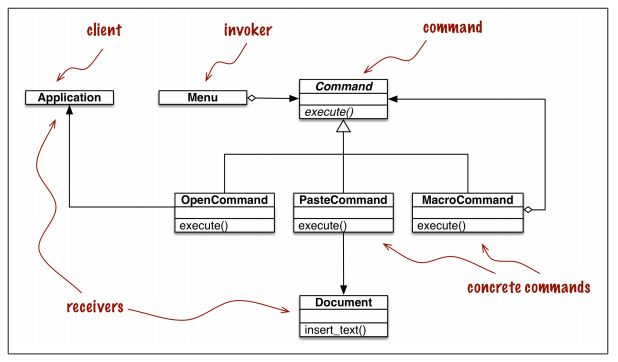

In [95]:
from IPython.display import Image
Image("UML.JPG")